kaggle ~ https://www.kaggle.com/datasets/joebeachcapital/nintendo-games

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [2]:
# Load dataset
Games = pd.read_csv('NintendoGames.csv')
Games

meta_score                                              title platform  \
0            NaN                                    Super Mario RPG   Switch   
1            NaN                                WarioWare: Move It!   Switch   
2            NaN                           Super Mario Bros. Wonder   Switch   
3            NaN                          Detective Pikachu Returns   Switch   
4            NaN                                           Fae Farm   Switch   
...          ...                                                ...      ...   
1089         NaN                                     Yo-kai Watch 4   Switch   
1090         NaN     Splatoon 3: Expansion Pass Wave 2 - Side Order   Switch   
1091         NaN  Mario Kart 8 Deluxe: Booster Course Pass - Wave 6   Switch   
1092         NaN                 Princess Peach for Nintendo Switch   Switch   
1093         NaN                         Luigi's Mansion: Dark Moon   Switch   

              date  user_score  \
0     Nov 17, 2023         NaN   
1      Nov 3, 2023         NaN   
2     Oct 20, 2023         NaN   
3      Oct 6, 2023         NaN   
4      Sep 8, 2023         NaN   
...            ...         ...   
1089           TBA         NaN   
1090           TBA         NaN   
1091           TBA         NaN   
1092      TBA 2024         NaN   
1093      TBA 2024         NaN   

                                                   link esrb_rating  \
0                          /game/switch/super-mario-rpg           E   
1                       /game/switch/warioware-move-it!          RP   
2                  /game/switch/super-mario-bros-wonder           E   
3                /game/switch/detective-pikachu-returns         NaN   
4                                 /game/switch/fae-farm        E10+   
...                                                 ...         ...   
1089                        /game/switch/yo-kai-watch-4        E10+   
1090  /game/switch/splatoon-3-expansion-pass-wave-2-...         NaN   
1091  /game/switch/mario-kart-8-deluxe-booster-cours...         NaN   
1092    /game/switch/princess-peach-for-nintendo-switch         NaN   
1093              /game/switch/luigis-mansion-dark-moon         NaN   

                   developers                                           genres  
0                ['Nintendo']               ['Role-Playing', 'Japanese-Style']  
1     ['Intelligent Systems']            ['Miscellaneous', 'Party / Minigame']  
2                ['Nintendo']                   ['Action', 'Platformer', '2D']  
3          ['Creatures Inc.']              ['Adventure', '3D', 'Third-Person']  
4            ['Phoenix Labs']        ['Simulation', 'Virtual', 'Virtual Life']  
...                       ...                                              ...  
1089              ['Level 5']                      ['Role-Playing', 'Trainer']  
1090             ['Nintendo']  ['Action', 'Shooter', 'Third-Person', 'Arcade']  
1091             ['Nintendo']               ['Racing', 'Arcade', 'Automobile']  
1092             ['Nintendo']                         ['Adventure', 'General']  
1093     ['Next Level Games']                  ['Action Adventure', 'General']  

[1094 rows x 9 columns]

In [3]:
Games.isnull().sum()

meta_score     385
title            0
platform         0
date             0
user_score     238
link             0
esrb_rating    122
developers       3
genres           0
dtype: int64

We can use the games which don't have meta scores as a holdout set and train and test with the remaining games

In [4]:
HoldoutData = Games[Games['meta_score'].isnull() == True]
HoldoutData

meta_score                                              title platform  \
0            NaN                                    Super Mario RPG   Switch   
1            NaN                                WarioWare: Move It!   Switch   
2            NaN                           Super Mario Bros. Wonder   Switch   
3            NaN                          Detective Pikachu Returns   Switch   
4            NaN                                           Fae Farm   Switch   
...          ...                                                ...      ...   
1089         NaN                                     Yo-kai Watch 4   Switch   
1090         NaN     Splatoon 3: Expansion Pass Wave 2 - Side Order   Switch   
1091         NaN  Mario Kart 8 Deluxe: Booster Course Pass - Wave 6   Switch   
1092         NaN                 Princess Peach for Nintendo Switch   Switch   
1093         NaN                         Luigi's Mansion: Dark Moon   Switch   

              date  user_score  \
0     Nov 17, 2023         NaN   
1      Nov 3, 2023         NaN   
2     Oct 20, 2023         NaN   
3      Oct 6, 2023         NaN   
4      Sep 8, 2023         NaN   
...            ...         ...   
1089           TBA         NaN   
1090           TBA         NaN   
1091           TBA         NaN   
1092      TBA 2024         NaN   
1093      TBA 2024         NaN   

                                                   link esrb_rating  \
0                          /game/switch/super-mario-rpg           E   
1                       /game/switch/warioware-move-it!          RP   
2                  /game/switch/super-mario-bros-wonder           E   
3                /game/switch/detective-pikachu-returns         NaN   
4                                 /game/switch/fae-farm        E10+   
...                                                 ...         ...   
1089                        /game/switch/yo-kai-watch-4        E10+   
1090  /game/switch/splatoon-3-expansion-pass-wave-2-...         NaN   
1091  /game/switch/mario-kart-8-deluxe-booster-cours...         NaN   
1092    /game/switch/princess-peach-for-nintendo-switch         NaN   
1093              /game/switch/luigis-mansion-dark-moon         NaN   

                   developers                                           genres  
0                ['Nintendo']               ['Role-Playing', 'Japanese-Style']  
1     ['Intelligent Systems']            ['Miscellaneous', 'Party / Minigame']  
2                ['Nintendo']                   ['Action', 'Platformer', '2D']  
3          ['Creatures Inc.']              ['Adventure', '3D', 'Third-Person']  
4            ['Phoenix Labs']        ['Simulation', 'Virtual', 'Virtual Life']  
...                       ...                                              ...  
1089              ['Level 5']                      ['Role-Playing', 'Trainer']  
1090             ['Nintendo']  ['Action', 'Shooter', 'Third-Person', 'Arcade']  
1091             ['Nintendo']               ['Racing', 'Arcade', 'Automobile']  
1092             ['Nintendo']                         ['Adventure', 'General']  
1093     ['Next Level Games']                  ['Action Adventure', 'General']  

[385 rows x 9 columns]

In [5]:
Games = Games[~Games['title'].isin(HoldoutData['title'])]
Games

meta_score                                              title platform  \
5           87.0                                           Pikmin 4   Switch   
7           74.0  Mario Kart 8 Deluxe: Booster Course Pass - Wave 5   Switch   
8           56.0                              Everybody 1-2-Switch!   Switch   
9           82.0                                           Pikmin 1   Switch   
10          65.0                                           Pikmin 2   Switch   
...          ...                                                ...      ...   
1064        88.0                                  Diddy Kong Racing      N64   
1065        96.0                                      GoldenEye 007      N64   
1067        90.0                                        Blast Corps      N64   
1070        80.0                                      Pilotwings 64      N64   
1081        68.0                                      Wii Karaoke U     WIIU   

              date  user_score  \
5     Jul 21, 2023         9.0   
7     Jul 12, 2023         7.6   
8     Jun 30, 2023         5.4   
9     Jun 21, 2023         8.4   
10    Jun 21, 2023         8.6   
...            ...         ...   
1064  Nov 24, 1997         8.4   
1065  Aug 25, 1997         8.9   
1067  Feb 28, 1997         8.4   
1070  Sep 29, 1996         7.9   
1081      Canceled         7.8   

                                                   link esrb_rating  \
5                                 /game/switch/pikmin-4        E10+   
7     /game/switch/mario-kart-8-deluxe-booster-cours...         NaN   
8                    /game/switch/everybody-1-2-switch!           E   
9                                 /game/switch/pikmin-1        E10+   
10                                /game/switch/pikmin-2        E10+   
...                                                 ...         ...   
1064                /game/nintendo-64/diddy-kong-racing           E   
1065                    /game/nintendo-64/goldeneye-007           T   
1067                      /game/nintendo-64/blast-corps           E   
1070                    /game/nintendo-64/pilotwings-64           E   
1081                          /game/wii-u/wii-karaoke-u         NaN   

                      developers  \
5                   ['Nintendo']   
7                   ['Nintendo']   
8                   ['Nintendo']   
9                   ['Nintendo']   
10                  ['Nintendo']   
...                          ...   
1064               ['Rare Ltd.']   
1065               ['Rare Ltd.']   
1067               ['Rare Ltd.']   
1070  ['Paradigm Entertainment']   
1081                    ['TOSE']   

                                                 genres  
5                  ['Strategy', 'Real-Time', 'General']  
7                    ['Racing', 'Arcade', 'Automobile']  
8                 ['Miscellaneous', 'Party / Minigame']  
9                  ['Strategy', 'Real-Time', 'General']  
10                 ['Strategy', 'Real-Time', 'General']  
...                                                 ...  
1064                      ['Driving', 'Racing', 'Kart']  
1065    ['Action', 'Shooter', 'First-Person', 'Modern']  
1067                              ['Action', 'General']  
1070                          ['Simulation', 'General']  
1081  ['Action', 'Miscellaneous', 'Rhythm', 'Music',...  

[682 rows x 9 columns]

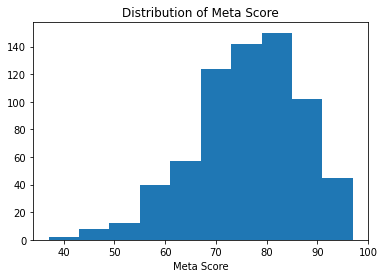

In [8]:
plt.hist(Games.meta_score)
plt.xlabel('Meta Score')
plt.title('Distribution of Meta Score')
plt.show()